# Business Understanding

## Project Domain

Proyek ini tentang industri Perikanan dan Teknologi Prediktif (Fish Market & Predictive Modeling). Industri perikanan sangat bergantung pada penimbangan ikan untuk menentukan harga jual, mengelompokkan produk, dan mengatur distribusi. Proyek ini menggabungkan domain tersebut dengan teknologi kecerdasan buatan, khususnya Machine Learning, untuk menciptakan solusi otomatisasi prediksi berat ikan.

## Problem Statements

Masalah utama yang ingin diselesaikan adalah bagaimana cara memprediksi berat ikan secara akurat hanya berdasarkan input ukuran fisik seperti panjang, tinggi, lebar, dan jenis ikan, tanpa harus menggunakan alat timbang.

## Goals

Maka dari itu, tujuan dari proyek ini adalah membangun model prediktif berbasis Artificial Neural Network (ANN) yang mampu memperkirakan berat ikan dengan tingkat akurasi minimal 80%. Model ini harus cukup efisien untuk digunakan dalam aplikasi praktis dan mampu memberikan hasil yang cepat serta akurat.

## Solution Statements

Solusi dari proyek ini adalah membangun sistem prediksi berat ikan yang :

Menggunakan model Artificial Neural Network (ANN) karena mampu memodelkan hubungan non-linear antara input fitur dan target berat, diterapkan dalam antarmuka pengguna berbasis web menggunakan Streamlit, sehingga pengguna hanya perlu memilih jenis ikan dan memasukkan ukuran fisik untuk mendapatkan estimasi berat, model juga dikonversi ke format TensorFlow Lite (.tflite) agar bisa digunakan di berbagai platform, seperti aplikasi Android.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fathiadarinaqliya","key":"6c28882d003e977897028412d04159bb"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d vipullrathod/fish-market --force

Dataset URL: https://www.kaggle.com/datasets/vipullrathod/fish-market
License(s): CC0-1.0
  0% 0.00/2.38k [00:00<?, ?B/s]
100% 2.38k/2.38k [00:00<00:00, 9.87MB/s]


In [5]:
!mkdir fish-market
!unzip fish-market.zip -d fish-market
!ls fish-market

Archive:  fish-market.zip
  inflating: fish-market/Fish.csv    
Fish.csv


## Import Library yang dibutuhkan

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras.backend as K
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [11]:
df = pd.read_csv('fish-market/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Exploratory Data Analysis

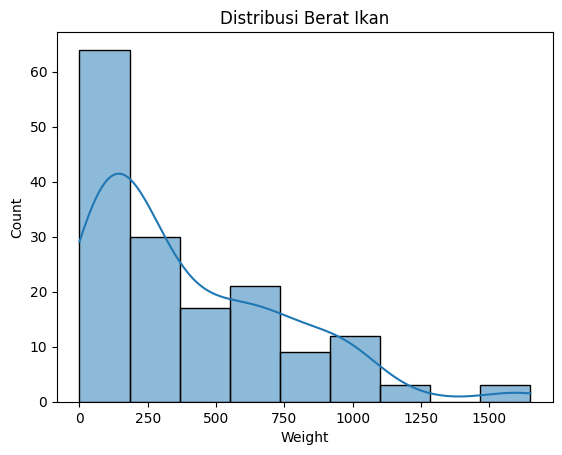

In [12]:
# Distribusi target
sns.histplot(df['Weight'], kde=True)
plt.title("Distribusi Berat Ikan")
plt.show()

<ipython-input-17-09247bbf2005>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='Weight', data=df, palette='viridis')


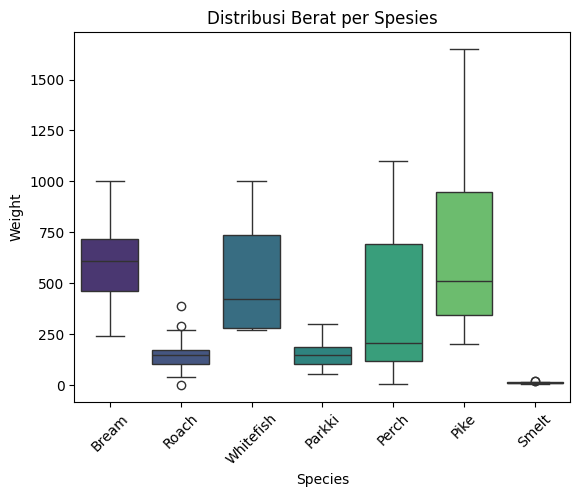

In [17]:
# Boxplot masing-masing spesies
sns.boxplot(x='Species', y='Weight', data=df, palette='viridis')
plt.title("Distribusi Berat per Spesies")
plt.xticks(rotation=45)
plt.show()

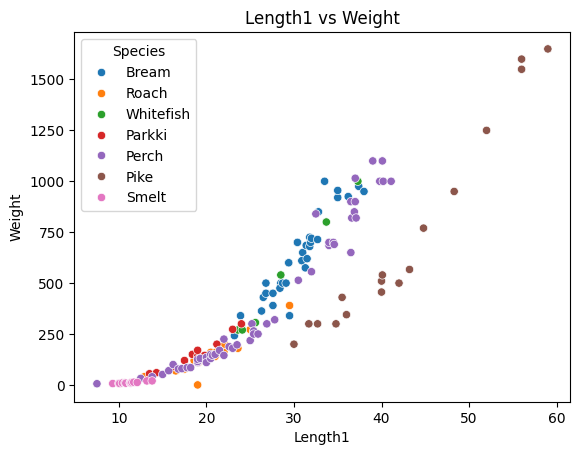

In [15]:
# Scatter plot Length vs Weight
sns.scatterplot(x='Length1', y='Weight', hue='Species', data=df)
plt.title("Length1 vs Weight")
plt.show()

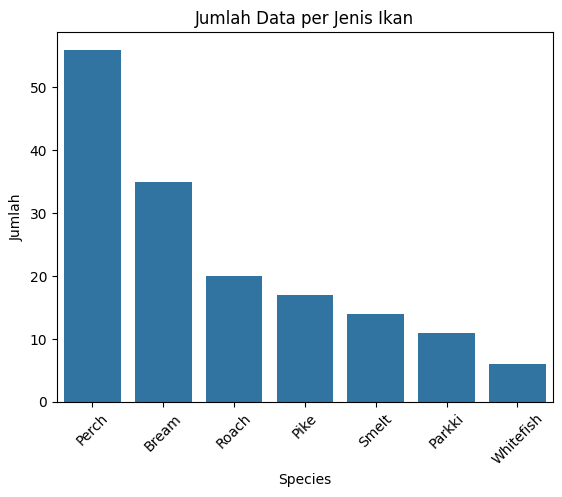

In [22]:
sns.countplot(data=df, x='Species', order=df['Species'].value_counts().index)
plt.title("Jumlah Data per Jenis Ikan")
plt.xticks(rotation=45)
plt.ylabel("Jumlah")
plt.xlabel("Species")
plt.show()

<ipython-input-25-196089d446a4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Species', y='Length1', inner='box', palette='Set2')


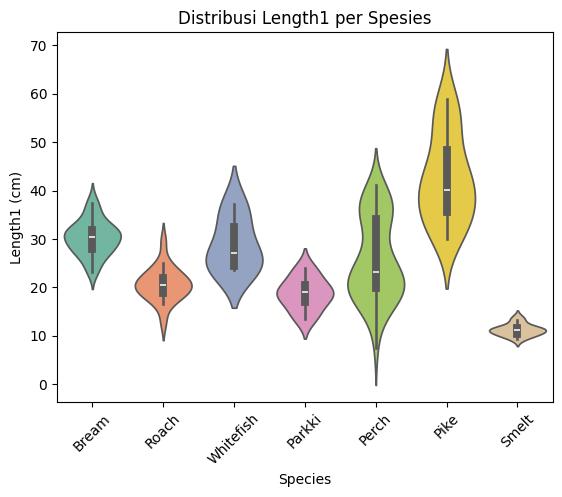

In [25]:
sns.violinplot(data=df, x='Species', y='Length1', inner='box', palette='Set2')
plt.title("Distribusi Length1 per Spesies")
plt.xticks(rotation=45)
plt.ylabel("Length1 (cm)")
plt.show()

# Data Preparation

In [26]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [27]:
print(df.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [28]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Simpan LabelEncoder
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [29]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [30]:
X = df.drop('Weight', axis=1)
y = df['Weight']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# Modeling

In [32]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output regresi

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [35]:
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.1,
                    epochs=100,
                    batch_size=32,
                    verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 4283.4072 - mae: 47.8994 - val_loss: 5165.7559 - val_mae: 67.5288
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4283.2266 - mae: 48.4651 - val_loss: 5127.6069 - val_mae: 67.2393
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4436.2817 - mae: 48.4864 - val_loss: 5081.4766 - val_mae: 66.8893
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4114.2417 - mae: 47.8824 - val_loss: 5041.1123 - val_mae: 66.5947
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5349.1797 - mae: 52.5266 - val_loss: 4990.1377 - val_mae: 66.2067
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4801.6396 - mae: 50.7489 - val_loss: 4939.6401 - val_mae: 65.8288
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4251.7705 - mae: 48.3819 - val_loss: 4904.7520 - val_mae: 65.5717
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5016.2290 - mae: 50.6005 - val_loss: 4874.1631 - val_mae: 65.3399
Epoch 9/

# Evaluation

In [38]:
y_pred = model.predict(X_test_scaled).flatten()
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
R2 Score: 0.98
MAE: 45.06
RMSE: 57.81


# Deployment

## Model Simulation

In [45]:
# Spesies: 'Bream' → sesuai label encoder
input_species = le.transform(['Bream'])[0]

# Contoh data input [Species, Length1, Length2, Length3, Height, Width]
new_data = np.array([[input_species, 25.0, 27.0, 29.0, 11.5, 4.0]])

# Scale input
new_data_scaled = scaler.transform(new_data)

# Prediksi berat
predicted_weight = model.predict(new_data_scaled).flatten()[0]
print(f"Perkiraan Berat Ikan : {predicted_weight:.2f} gram")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Perkiraan Berat Ikan : 251.20 gram


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Save Model

In [40]:
# Konversi ke tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan ke file
with open('fish_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpvqf9xlfq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132462387983376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132462387984528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132462387983760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132462387981264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132462387983952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132462387983568: TensorSpec(shape=(), dtype=tf.resource, name=None)
